<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
cancer = load_breast_cancer()

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(
    cancer.data,cancer.target,stratify=cancer.target,random_state = 66
)

In [3]:
X_train.shape
from sklearn.neighbors import KNeighborsClassifier as knc

In [4]:
neighbors_settings = range(1,11)
training_accuracy=[]
test_accuracy = []

for n in neighbors_settings:
    clf = knc(n_neighbors = n)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

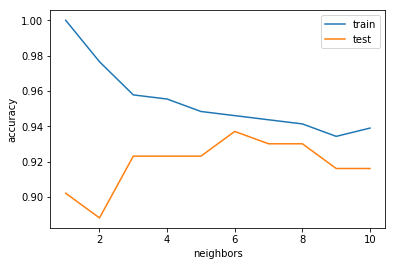

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(neighbors_settings,training_accuracy,label = "train")
ax.plot(neighbors_settings,test_accuracy,label="test")
ax.set_xlabel("neighbors")
ax.set_ylabel("accuracy")
ax.legend()

In [7]:
import mglearn

w[0]: 0.393906  b: -0.031804


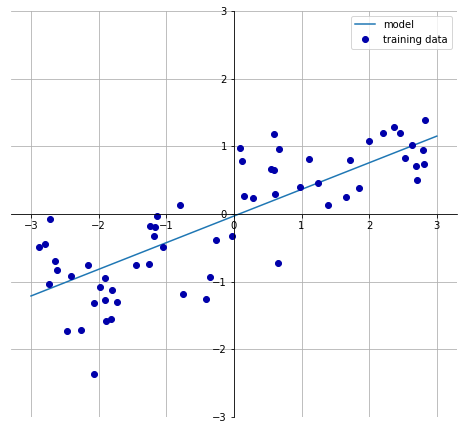

In [8]:
mglearn.plots.plot_linear_regression_wave()

In [9]:
from sklearn.neighbors import KNeighborsRegressor as knr

In [10]:
X,y = mglearn.datasets.make_wave(n_samples=40)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
reg= knr(n_neighbors = 3)
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [12]:
reg.score(X_test,y_test)

0.8344172446249604

In [13]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=40)

In [17]:
lr = LinearRegression().fit(X_train,y_train)
lr.coef_,lr.intercept_

(array([0.41903332]), -0.09450848331906847)

In [18]:
lr.score(X_test,y_test)

0.7423790374659854

In [19]:
from sklearn.linear_model import Ridge
rgrg  = Ridge(alpha=0.1).fit(X_train,y_train)
rgrg.score(X_test,y_test)

0.7423718260290956

In [20]:
from sklearn.tree import DecisionTreeClassifier as dtc

In [21]:
cancer = load_breast_cancer()

In [22]:
X_train,X_test,y_train,y_test = train_test_split(
    cancer.data, cancer.target,stratify = cancer.target, random_state=45
)
tree = dtc(random_state = 0,max_depth=4)
tree.fit(X_train,y_train)
tree.score(X_test,y_test)

0.9370629370629371

In [23]:
tree.feature_importances_

array([0.        , 0.02332154, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.07269903, 0.        , 0.        ,
       0.00999317, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01028778, 0.03498231, 0.        , 0.        ,
       0.        , 0.03660875, 0.76144817, 0.        , 0.        ,
       0.        , 0.        , 0.05065925, 0.        , 0.        ])

In [24]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100, noise = 0.25, random_state=3)
X_train,X_test,y_train,y_test = train_test_split(
    X,y,stratify=y, random_state=42
)

In [25]:
forest = rfc(n_estimators=5, random_state= 2)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

Text(0.5, 1.0, 'random forest')

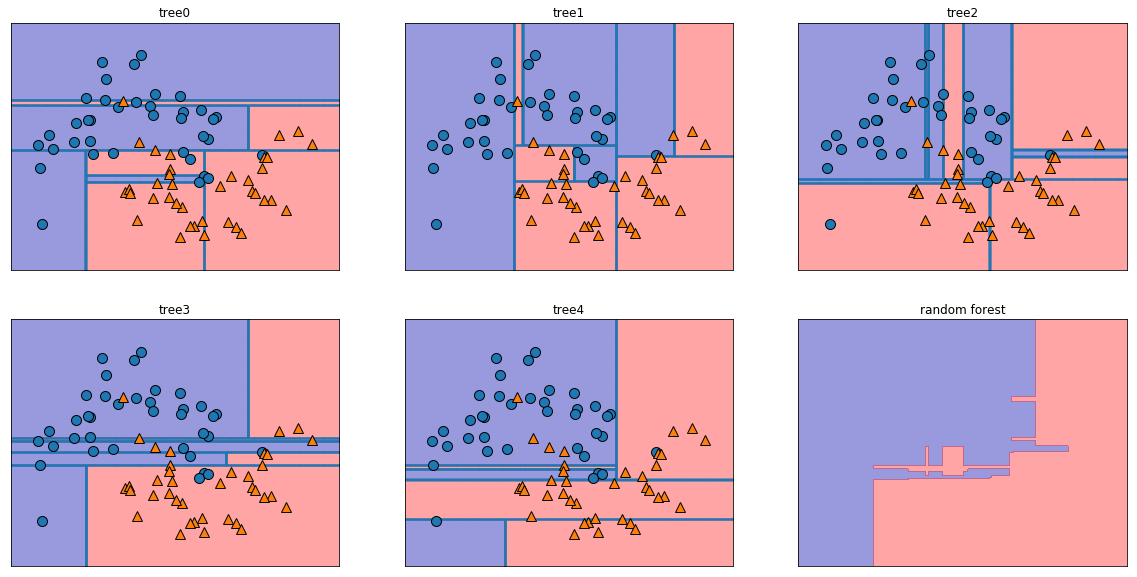

In [26]:
fig,axes= plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title("tree{}".format(i))
    mglearn.plots.plot_tree_partition(X_train,y_train,tree,ax=ax)
mglearn.plots.plot_2d_separator(forest,X_train,ax=axes[-1,-1],fill=True,alpha=0.4)
axes[-1,-1].set_title("random forest")

In [27]:
tree.score(X_test,y_test)

0.88

In [35]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'feature 1')

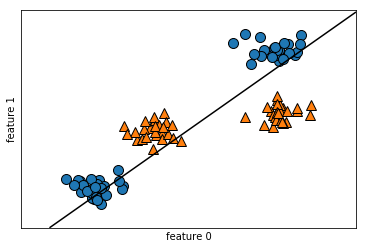

In [36]:
X, y = make_blobs(centers=4, random_state=8)
y = y%2
lsvm=LinearSVC().fit(X,y)

mglearn.discrete_scatter(X[:,0],X[:,1],y)
mglearn.plots.plot_2d_separator(lsvm,X)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in power
  # Remove the CWD from sys.path while we load stuff.


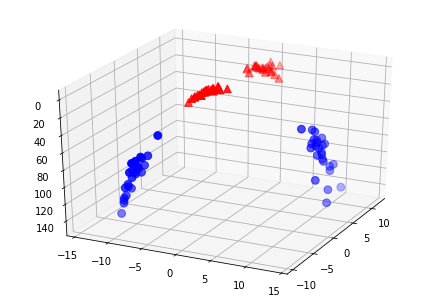

In [53]:
import numpy as np
X_new = np.hstack([X,X[:,1:]**2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
fig = plt.figure()
ax = Axes3D(fig,elev=-152,azim = -26)
xx= np.linspace(X_new[:,0].min()-2,X_new[:,0].max()+2,50)
yy = np.linspace(X_new[:,1].min()-2,X_new[:,1].max()+2,50)
XX,YY=np.meshgrid(xx,yy)
lsvm3d= LinearSVC().fit(X_new,y)
ZZ= (coef_[0]*XX+coef_[1]**YY + intercept_)/-coef_[2]
ax.plot_surface(XX,YY,ZZ, rstride=8,cstride=8,alpha=0.3)
coef_ , intercept_ = lsvm3d.coef_.ravel(),lsvm3d.intercept_
mask= y==0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c="b",cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c="r",marker="^",cmap=mglearn.cm2,s=60)




In [55]:
from sklearn.neural_network import MLPClassifier

In [56]:
from sklearn.datasets import make_moons

In [57]:
X,y = make_moons(n_samples=100,noise=0.25,random_state=3)

In [59]:
X_train,X_test,y_train,y_test= train_test_split(
    X,y,stratify=y,random_state=32
)

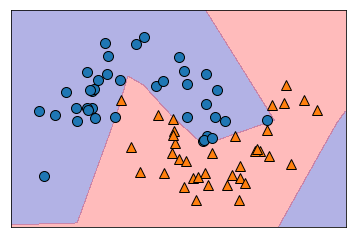

In [71]:
mlp= MLPClassifier(
    solver="lbfgs",
    random_state=0,
    hidden_layer_sizes=[10],
    activation="relu"
).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(
    mlp,
    X_train,
    fill=True,
    alpha=0.3
)
mglearn.discrete_scatter(
    X_train[:,0],X_train[:,1],y_train
)
